# Softmax and temperature scaling

In this notebook we will take a look at the softmax function and its behavior for different values of the logits.
We will also study the impact of temperature scaling over the final probabilities

In [1]:
%matplotlib inline

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def softmax(X, scale = 1.0, axis = None):
    """
    Compute the softmax of each element along an axis of X.

    Parameters
    ----------
    X: ND-Array. Probably should be floats.
    scale (optional): float parameter, used as a multiplier
        prior to exponentiation. Default = 1.0
    axis (optional): axis to compute values along. Default is the
        first non-singleton axis.

    Returns an array the same size as X. The result will sum to 1
    along the specified axis.
    """

    # make X at least 2d
    y = np.atleast_2d(X)

    # find axis
    if axis is None:
        axis = next(j[0] for j in enumerate(y.shape) if j[1] > 1)

    # multiply y against the theta parameter,
    y = y * float(scale)

    # exponentiate y
    y = np.exp(y)

    # take the sum along the specified axis
    ax_sum = np.expand_dims(np.sum(y, axis = axis), axis)

    # finally: divide elementwise
    p = y / ax_sum

    # flatten if X was 1D
    if len(X.shape) == 1: p = p.flatten()

    return p

Generate a range of logits

In [18]:
x = np.arange(0, 1, 0.2)
logits_1 = x 
logits_2 = -2*x - 2
logits_3 = -3*x + 1

There are two parameters that you can adjust:
- `logits_multiplier`: controlling the magnitudes of the logits
- `temperature`: the coefficient used for adjusting the softmax values

## Exercise

Try out different values for `logits_multiplier` in the range $[1,50]$ and for the `temperature` in the range $[0.1,200]$.
What do you notice?

Text(0.5, 1.0, 'probas_scaled')

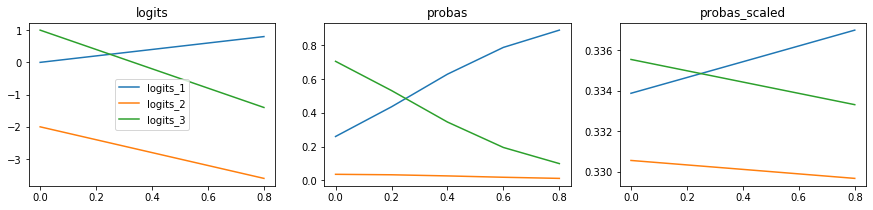

In [48]:
logits_multiplier = 1
temperature = 200

logits = np.array([logits_1, logits_2, logits_3])* logits_multiplier
probas = softmax(logits, scale = 1, axis = 0)
probas_scaled = softmax(logits, scale = 1/temperature, axis = 0)

plt.figure(figsize=(15,3))
plt.subplot(1,3,1)

plt.plot(x, logits.T)
plt.legend(['logits_1','logits_2','logits_3'])
plt.title('logits')

plt.subplot(1,3,2)
plt.plot(x, probas.T)
plt.title('probas')

plt.subplot(1,3,3)
plt.plot(x, probas_scaled.T)
plt.title('probas_scaled')
